# Creating an MNIST classifier using TensorFlows subclassing API

Different imports

In [16]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Normalise training values tto bbe between 0 and 1 and reshape training data (each image is 28x28)

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
x_validation,x_test,y_validation,y_test=x_test[:5000],x_test[5000:],y_test[:5000],y_test[5000:]

print(x_train.shape)
print(y_train.shape)
x_train=np.reshape(x_train,(-1,28,28))
y_train=np.reshape(y_train,(-1,1))
print(x_validation.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)


Create a wide and deep model (i.e. has two different branches that later converge) with the attributes defined below.

In [2]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self,dropout_rate=0.2,units=300, activation='relu', **kwargs):
            super().__init__(**kwargs)
            self.flatten=tf.keras.layers.Flatten(input_shape=[28,28])
            self.hidden1=tf.keras.layers.Dense(units=units, activation=activation)
            self.hidden2=tf.keras.layers.Dense(units=units, activation=activation)
            self.dropout=tf.keras.layers.Dropout(rate=dropout_rate)
            self.main_output=tf.keras.layers.Dense(units=10, activation='softmax')
            self.aux_output=tf.keras.layers.Dense(units=10, activation='softmax')
    
    def call(self,inputs):
        input_A,input_B=inputs,inputs
        input_A=self.flatten(input_A)
        input_B=self.flatten(input_B)
        input_A=input_A[:,:100]
        input_B=input_B[:,100:]
        hidden1=self.hidden1(input_B)
        dropout_layer=self.dropout(hidden1)
        hidden2=self.hidden2(dropout_layer)
        concat=tf.keras.layers.concatenate([input_A,hidden2])
        aux_output=self.aux_output(hidden2)
        main_output=self.main_output(concat)
        
        return main_output,aux_output

model=WideAndDeepModel()


        

Split x_train and x_validation into two sections, where each section gets sent to a different branch.

In [38]:
x_train_A,x_train_B=x_train[:1000,:,:],x_train[1000:,:,:]

In [39]:
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [19]:
x_validation_A,x_validation_B=x_validation[:200,:,:],x_validation[200:,:,:]

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])

In [25]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [26]:
import tensorboard
tensorboard.__version__

'2.6.0'

In [28]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
history=model.fit(x_train,y_train,epochs=30,batch_size=32,
                  validation_data=(x_validation,y_validation),
                  callbacks=[tensorboard_callback])


Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0266 - output_1_loss: 0.0133 - output_2_loss: 0.0132 - output_1_accuracy: 0.9969 - output_2_accuracy: 0.9969 - val_loss: 0.4042 - val_output_1_loss: 0.2023 - val_output_2_loss: 0.2019 - val_output_1_accuracy: 0.9782 - val_output_2_accuracy: 0.9778
Epoch 2/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0361 - output_1_loss: 0.0180 - output_2_loss: 0.0180 - output_1_accuracy: 0.9961 - output_2_accuracy: 0.9961 - val_loss: 0.3768 - val_output_1_loss: 0.1887 - val_output_2_loss: 0.1881 - val_output_1_accuracy: 0.9778 - val_output_2_accuracy: 0.9774
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - output_1_loss: 0.0125 - output_2_loss: 0.0127 - output_1_accuracy: 0.9971 - output_2_accuracy: 0.9971 - val_loss: 0.4168 - val_output_1_loss: 0.2086 - val_output_2_loss: 0.2081 - val_output_1_accuracy: 0.9758 - val_output_2_accuracy: 0.9768
Epoch 4/30
1875/1875 [

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - output_1_loss: 0.0127 - output_2_loss: 0.0129 - output_1_accuracy: 0.9976 - output_2_accuracy: 0.9977 - val_loss: 0.6189 - val_output_1_loss: 0.3056 - val_output_2_loss: 0.3133 - val_output_1_accuracy: 0.9760 - val_output_2_accuracy: 0.9748
Epoch 27/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - output_1_loss: 0.0168 - output_2_loss: 0.0166 - output_1_accuracy: 0.9967 - output_2_accuracy: 0.9969 - val_loss: 0.5846 - val_output_1_loss: 0.2883 - val_output_2_loss: 0.2963 - val_output_1_accuracy: 0.9770 - val_output_2_accuracy: 0.9772
Epoch 28/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0301 - output_1_loss: 0.0150 - output_2_loss: 0.0151 - output_1_accuracy: 0.9974 - output_2_accuracy: 0.9975 - val_loss: 0.5931 - val_output_1_loss: 0.2957 - val_output_2_loss: 0.2974 - val_output_1_accuracy: 0.9744 - val_output_2_accuracy: 0.9748
Epoch 29/30
1875/1875 [========

In [36]:
%tensorboard --logdir logs

Summary of the model

In [35]:
print(model.summary())

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  205500    
_________________________________________________________________
dense_1 (Dense)              multiple                  90300     
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  4010      
_________________________________________________________________
dense_3 (Dense)              multiple                  3010      
Total params: 302,820
Trainable params: 302,820
Non-trainable params: 0
_________________________________________

In [9]:
print(x_test[0].shape)

(28, 28)


Use model to predict the x_test numbers and inspect the first prerdiction

In [40]:
prediction=model.predict(x_test)

In [41]:
print(prediction[0][0])

[0.0000000e+00 0.0000000e+00 1.4097000e-21 1.0000000e+00 0.0000000e+00
 8.1794206e-27 0.0000000e+00 6.7241104e-32 1.2323810e-19 1.1636637e-37]


In [42]:
import numpy as np

max_index=np.argmax(prediction[0][0])
print(max_index)

3


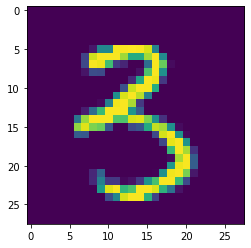

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
image = np.asarray(x_test[0])
plt.imshow(image)
plt.show()


We can see that the prediction was correct.